In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

In [2]:
theta0 = np.pi/4
v0 = 0.5
duree = 20

In [3]:
def F(Y) : return np.array([ Y[1],-np.sin(Y[0]) ])

In [4]:
def EulerExpl(F,nbpas,duree,theta0,v0) :
    dt = duree/nbpas
    X = np.zeros( (nbpas+1,2) )
    Temps = np.linspace(0,duree,nbpas+1)
    X[0] = [theta0,v0] 
    for n in range(nbpas) :
        X[n+1] = X[n] + dt*F(X[n])
    return X,Temps

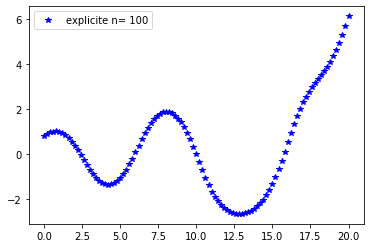

In [5]:
Nbpoints = 100
R1,Temps1 = EulerExpl(F,Nbpoints,duree,theta0,v0)
plt.plot(Temps1,R1[:,0],"b*",label = "explicite n= {:d}".format(Nbpoints))
plt.legend()

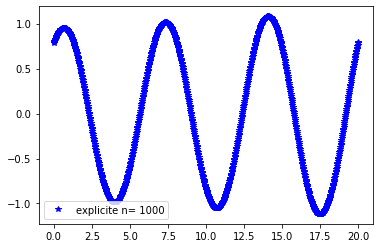

In [6]:
Nbpoints = 1000
R1,Temps1 = EulerExpl(F,Nbpoints,duree,theta0,v0)
plt.plot(Temps1,R1[:,0],"b*",label = "explicite n= {:d}".format(Nbpoints))
plt.legend()

In [7]:
def EulerImpl(nbpas) :
    dt = duree/nbpas
    X = np.zeros( (nbpas+1,2) )
    Temps = np.linspace(0,duree,nbpas+1)
    X[0] = [theta0,v0] 
    for n in range(nbpas) :
        def h(V) : return X[n] + dt*F(V) - V
        X[n+1] = root(h,X[n]).x 
    return X,Temps

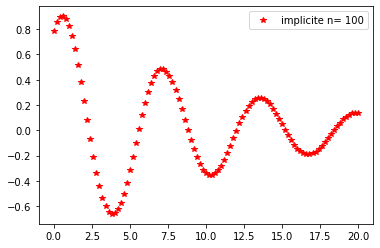

In [8]:
Nbpoints = 100
R2,Temps2 = EulerImpl(Nbpoints)
plt.plot(Temps2,R2[:,0],"r*",label = "implicite n= {:d}".format(Nbpoints))
plt.legend()

In [1]:
Nbpoints = 30
R2,Temps2 = EulerImpl(Nbpoints)
plt.plot(Temps2,R2[:,0],"r*",label = "implicite n= {:d}".format(Nbpoints))
plt.legend()

NameError: name 'EulerImpl' is not defined

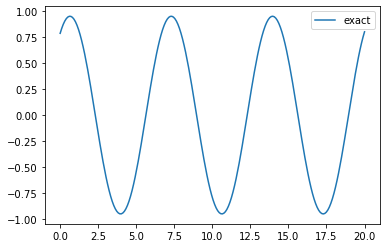

In [12]:
from scipy.integrate import odeint
def F1(Y,t) : return np.array([ Y[1],-np.sin(Y[0]) ])
Xini = np.array([theta0,v0])
Vt = np.linspace(0,20,200)
R = odeint(F1,Xini,Vt)
plt.plot(Vt,R[:,0],label = "exact")
plt.legend()